# Phishing website detection using Image Model

In [2]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
import glob
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os



# Define a function to load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=target_size)
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Load your image file paths
safe_site_images = glob.glob(r'D:\Project_Fake_Site_Detection\Safe_Site\*.png')
unsafe_site_images = glob.glob(r'D:\Project_Fake_Site_Detection\Unsafe_Site\*.png')

# Load and preprocess image data
safe_site_data = load_and_preprocess_images(safe_site_images)
unsafe_site_data = load_and_preprocess_images(unsafe_site_images)

# Create labels
safe_labels = np.zeros(len(safe_site_data))  # Label 0 for safe sites
unsafe_labels = np.ones(len(unsafe_site_data))  # Label 1 for unsafe sites

# Combine data and labels
X = np.concatenate((safe_site_data, unsafe_site_data), axis=0)
y = np.concatenate((safe_labels, unsafe_labels), axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Import necessary Keras modules for building the model
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam

# Load the VGG16 model with pre-trained weights and customize the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
# Add custom fully connected layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Specify training parameters
epochs = 13  
batch_size = 32  

model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)


Epoch 1/13
23/23 [==============================] - 184s 8s/step - loss: 12.1218 - accuracy: 0.6317 - val_loss: 0.7306 - val_accuracy: 0.5109
Epoch 2/13
23/23 [==============================] - 177s 8s/step - loss: 0.5090 - accuracy: 0.7599 - val_loss: 0.4808 - val_accuracy: 0.7446
Epoch 3/13
23/23 [==============================] - 176s 8s/step - loss: 0.4020 - accuracy: 0.8213 - val_loss: 0.3448 - val_accuracy: 0.8533
Epoch 4/13
23/23 [==============================] - 175s 8s/step - loss: 0.2867 - accuracy: 0.8881 - val_loss: 0.3132 - val_accuracy: 0.8913
Epoch 5/13
23/23 [==============================] - 176s 8s/step - loss: 0.3058 - accuracy: 0.8813 - val_loss: 0.2948 - val_accuracy: 0.8696
Epoch 6/13
23/23 [==============================] - 175s 8s/step - loss: 0.2585 - accuracy: 0.8922 - val_loss: 0.2883 - val_accuracy: 0.9076
Epoch 7/13
23/23 [==============================] - 179s 8s/step - loss: 0.2327 - accuracy: 0.9141 - val_loss: 0.3818 - val_accuracy: 0.9022
Epoch 8/13
2

In [7]:
#  Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


6/6 [==============================] - 8s 1s/step - loss: 0.3800 - accuracy: 0.9185
Test loss: 0.3800
Test accuracy: 91.85%


In [ ]:
# Save the trained model
model.save('phishing_detection_model.h5')

In [2]:
from keras.models import load_model
model = load_model('phishing_detection_model.h5')

1/1 [==============================] - 0s 345ms/step


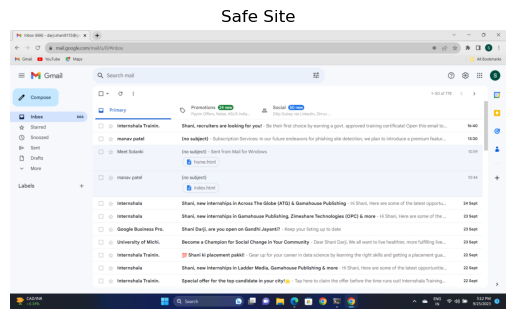

In [4]:
# Import necessary libraries for making predictions on a new image
from keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np

# Load and preprocess the example image
example_image_path = r'C:\Users\Darji\OneDrive\Pictures\Screenshots\Screenshot (133).png'  # Replace with the actual path to your image
img = Image.open(example_image_path)
img = img.convert('RGB')  # Convert to RGB mode
img = img.resize((224, 224))  # Resize the image to match the VGG16 input size
img = np.array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# Make predictions with the model
prediction = model.predict(img)

# The 'prediction' variable contains the model's output, which indicates whether the site is phishing or not.

import matplotlib.pyplot as plt

plt.imshow(Image.open(example_image_path))
plt.axis('off')

if prediction > 0.5:
    plt.title("Unsafe Site")
else:
    plt.title("Safe Site")

plt.show()
